In [29]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [28]:
trip=pd.read_csv('trip.csv')
trip

,date,for_inpop,g_for_inpop,kor_outpop,g_kor_outpop,income,g_income,expense,g_expense
0,2004-01,423726,-10.1,793334,-6.9,399.0,-4.5,732.0,-10.1
1,2004-02,403812,-1.2,670448,-7.9,439.0,-5.2,682.0,-12.0
2,2004-03,448940,-10.9,587629,-13.1,512.0,-10.4,691.0,-13.5
3,2004-04,452725,-42.7,642413,-89.3,471.0,-11.6,710.0,-53.2
4,2004-05,475937,-79.5,680185,-88.8,535.0,-45.9,665.0,-21.9
...,...,...,...,...,...,...,...,...,...
192,2020-01,1272708,15.2,2513030,-13.7,1579.7,2.0,2507.3,-6.7
193,2020-02,685212,-43.0,1046779,-60.0,1147.5,-26.2,1418.2,-35.7
194,2020-03,83497,-94.6,143366,-93.9,729.8,-67.2,881.5,-59.9
195,2020-04,29415,-98.2,31425,-98.6,351.8,-83.2,577.5,-75.0


In [3]:
trip['date'] = pd.to_datetime(trip['date'], format='%Y-%m')
trip

,date,for_inpop,g_for_inpop,kor_outpop,g_kor_outpop,income,g_income,expense,g_expense
0,2004-01-01,423726,-10.1,793334,-6.9,399.0,-4.5,732.0,-10.1
1,2004-02-01,403812,-1.2,670448,-7.9,439.0,-5.2,682.0,-12.0
2,2004-03-01,448940,-10.9,587629,-13.1,512.0,-10.4,691.0,-13.5
3,2004-04-01,452725,-42.7,642413,-89.3,471.0,-11.6,710.0,-53.2
4,2004-05-01,475937,-79.5,680185,-88.8,535.0,-45.9,665.0,-21.9
...,...,...,...,...,...,...,...,...,...
192,2020-01-01,1272708,15.2,2513030,-13.7,1579.7,2.0,2507.3,-6.7
193,2020-02-01,685212,-43.0,1046779,-60.0,1147.5,-26.2,1418.2,-35.7
194,2020-03-01,83497,-94.6,143366,-93.9,729.8,-67.2,881.5,-59.9
195,2020-04-01,29415,-98.2,31425,-98.6,351.8,-83.2,577.5,-75.0


In [88]:
trip=trip.set_index('date')
trip

,for_inpop,g_for_inpop,kor_outpop,g_kor_outpop,income,g_income,expense,g_expense
date,,,,,,,,
2004-01-01,423726,-10.1,793334,-6.9,399.0,-4.5,732.0,-10.1
2004-02-01,403812,-1.2,670448,-7.9,439.0,-5.2,682.0,-12.0
2004-03-01,448940,-10.9,587629,-13.1,512.0,-10.4,691.0,-13.5
2004-04-01,452725,-42.7,642413,-89.3,471.0,-11.6,710.0,-53.2
2004-05-01,475937,-79.5,680185,-88.8,535.0,-45.9,665.0,-21.9
...,...,...,...,...,...,...,...,...
2020-01-01,1272708,15.2,2513030,-13.7,1579.7,2.0,2507.3,-6.7
2020-02-01,685212,-43.0,1046779,-60.0,1147.5,-26.2,1418.2,-35.7
2020-03-01,83497,-94.6,143366,-93.9,729.8,-67.2,881.5,-59.9


In [89]:
inpop=pd.DataFrame(trip['for_inpop'])
y=inpop
y

,for_inpop
date,
2004-01-01,423726
2004-02-01,403812
2004-03-01,448940
2004-04-01,452725
2004-05-01,475937
...,...
2020-01-01,1272708
2020-02-01,685212
2020-03-01,83497


In [90]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [93]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5951.069139281039
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5507.968360705764
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5243.583566272035
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4887.875524317272
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5271.433599489944

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5216.59449377134
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4903.300401955924
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4876.9609198185535
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:54259.742013328134


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5405.419188517084
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5293.90309228785
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4734.498552076357
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5445.596148080658


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5723.338717373854
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4889.442848644816

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4732.9924416651975
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5177.607373279008
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4871.082117912634
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:4949.7905170671065
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4554.563839406115
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4894.119427430236

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4859.967646433723
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4612.625617523778


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:4548.832438055162
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:5151.419957309295
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:4841.81149377457
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4913.988829077209


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:4531.611837551189
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:4891.379334742613
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:4825.46913184343


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4607.318262521221
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:4528.641566591612


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:5203.972665152091
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:4895.812287985147
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4972.479210414557
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:4595.3141832750225
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4894.82478890536
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4890.013796673389
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4615.08038329151

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4591.857922975623

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5177.667676088862
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:4867.70196141732
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:4931.764624471596


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4557.2018084310475
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4891.400340568351
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4856.442335147074


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:4600.2092821543465


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:4553.410211938617
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5176.841808140225
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:4867.2454168856775
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:4940.984050990657


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4557.212621043329
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:4865.556350943012
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:4851.016972191607


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4582.440932293937
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:4554.517997031944
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:5153.200512048677


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency informa

ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:4843.522488088728
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:4915.956835885987


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:4533.486520696586
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:4867.480189355444
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:4827.139782342569

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:4583.063669839388


C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:4530.603735717074


In [32]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\anaconda\envs\college\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0894      0.388      0.230      0.818      -0.671       0.850
ma.L1          0.1846      0.392      0.471      0.638      -0.583       0.952
ma.S.L12      -0.7741      0.031    -24.674      0.000      -0.836      -0.713
sigma2      3.088e+10   1.57e-11   1.97e+21      0.000    3.09e+10    3.09e+10


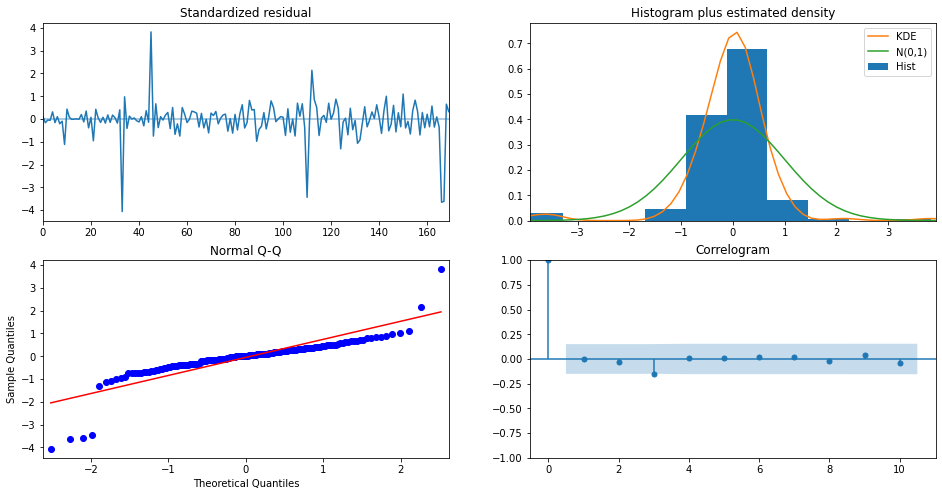

In [37]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

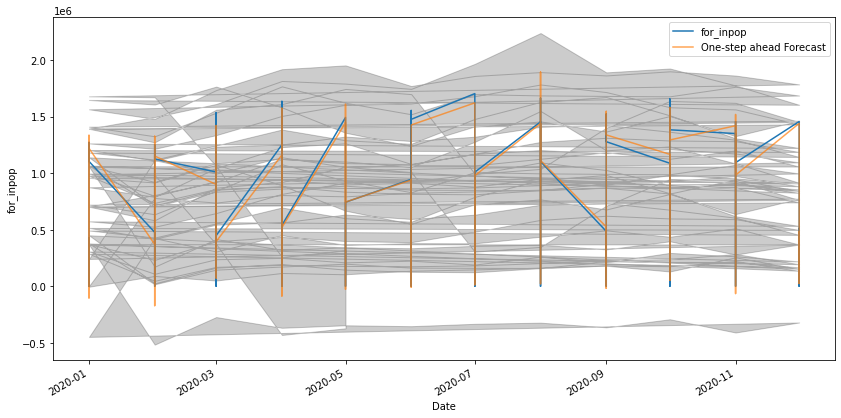

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('for_inpop')
plt.legend()
plt.show()

In [4]:
# native_culture=pd.read_csv('native_culture.csv')
# native_sport.csv=pd.read_csv('native_sport.csv.csv')
# native_travel=pd.read_csv('native_travel.csv')
foreigner=pd.read_csv('foreigner.csv')
foreigner=foreigner.iloc[:,1:]

In [18]:
foreigner

,NT,V2,V3,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,태국,서울,용산구,쇼핑,기타지출,201703,WHITE,기타,3917910,55
1,일본,서울,용산구,쇼핑,기타지출,201805,WHITE,기타,11586560,261
2,영국,서울,용산구,쇼핑,기타지출,201807,WHITE,기타,3483630,120
3,베트남,경기,오산시,쇼핑,기타지출,201705,WHITE,기타,12000,9
4,미국,서울,용산구,쇼핑,기타지출,201802,RED,기타,20831646,449
...,...,...,...,...,...,...,...,...,...,...
2730134,오스트레일리아,부산,사상구,쇼핑,기타쇼핑,202006,RED,기타,15000,1
2730135,미국,대전,동구,음식,유흥,202005,RED,기타,160000,1
2730136,중국,부산,부산진구,음식,유흥,202006,WHITE,기타,202171,2
2730137,일본,경기,파주시,의료,치과병원,202001,WHITE,기타,11900,1


In [20]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

In [41]:
foreigner_pivot=foreigner.pivot_table(values=["USEC"],index=["NT",'V2','V3','GB3'],columns=["TA_YM"],aggfunc='sum',fill_value=0).reset_index()
foreigner_pivot.columns=[i[0] + '_' + str(i[1]) for i in foreigner_pivot.columns]
foreigner_pivot=foreigner_pivot.rename({"NT_" : "NT", "V2_" : "V2", "V3_":"V3", "GB3_":"GB3", "GB2_":"GB2"},axis=1)
foreigner_pivot

,NT,V2,V3,GB3,USEC_201701,USEC_201702,USEC_201703,USEC_201704,USEC_201705,USEC_201706,...,USEC_201909,USEC_201910,USEC_201911,USEC_201912,USEC_202001,USEC_202002,USEC_202003,USEC_202004,USEC_202005,USEC_202006
0,대만,*,*,쇼핑,0,0,0,0,0,0,...,2,2,8,2,3,0,1,0,1,1
1,대만,강원,강릉시,교통,0,0,0,0,1,0,...,0,2,0,0,1,0,0,0,0,0
2,대만,강원,강릉시,쇼핑,3,28,11,18,22,9,...,73,41,29,39,66,19,10,5,5,7
3,대만,강원,강릉시,숙박,4,6,0,4,7,0,...,12,15,7,7,19,5,3,3,2,6
4,대만,강원,강릉시,스포츠,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,홍콩,충북,충주시,숙박,1,1,2,2,2,1,...,0,3,1,1,4,17,2,5,3,0
28840,홍콩,충북,충주시,스포츠,1,0,1,2,4,1,...,0,5,6,0,0,4,1,4,6,5
28841,홍콩,충북,충주시,음식,3,2,3,5,9,7,...,4,45,5,4,9,4,1,1,3,2
28842,홍콩,충북,충주시,의료,1,0,1,0,1,0,...,0,0,1,2,2,3,0,0,0,0


In [43]:
foreigner_pivot2=foreigner_pivot.drop(["NT","V2","V3","GB3"],1) 
foreigner_pivot2

,USEC_201701,USEC_201702,USEC_201703,USEC_201704,USEC_201705,USEC_201706,USEC_201707,USEC_201708,USEC_201709,USEC_201710,...,USEC_201909,USEC_201910,USEC_201911,USEC_201912,USEC_202001,USEC_202002,USEC_202003,USEC_202004,USEC_202005,USEC_202006
0,0,0,0,0,0,0,0,0,0,0,...,2,2,8,2,3,0,1,0,1,1
1,0,0,0,0,1,0,3,0,1,3,...,0,2,0,0,1,0,0,0,0,0
2,3,28,11,18,22,9,31,10,8,14,...,73,41,29,39,66,19,10,5,5,7
3,4,6,0,4,7,0,9,3,4,5,...,12,15,7,7,19,5,3,3,2,6
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,1,1,2,2,2,1,2,2,3,0,...,0,3,1,1,4,17,2,5,3,0
28840,1,0,1,2,4,1,2,6,4,2,...,0,5,6,0,0,4,1,4,6,5
28841,3,2,3,5,9,7,7,8,10,24,...,4,45,5,4,9,4,1,1,3,2
28842,1,0,1,0,1,0,0,0,0,0,...,0,0,1,2,2,3,0,0,0,0


In [44]:
x_train = np.expand_dims(foreigner_pivot2.iloc[:,:-1],axis=2) # axis = 2 : 마지막 차원을 추가 하기 위함
y_train = foreigner_pivot2.iloc[:,-1:]
x_test = np.expand_dims(foreigner_pivot2.iloc[:,1:],axis=2)
display(x_train,y_train)

array([[[ 0],
        [ 0],
        [ 0],
        ...,
        [ 1],
        [ 0],
        [ 1]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[ 3],
        [28],
        [11],
        ...,
        [10],
        [ 5],
        [ 5]],

       ...,

       [[ 3],
        [ 2],
        [ 3],
        ...,
        [ 1],
        [ 1],
        [ 3]],

       [[ 1],
        [ 0],
        [ 1],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [ 0]]], dtype=int64)

,USEC_202006
0,1
1,0
2,7
3,6
4,1
...,...
28839,0
28840,5
28841,2
28842,0


In [45]:
from keras.layers import LSTM, Dense
from keras import Sequential

model = Sequential() 
model.add(LSTM(32, input_shape=(33,1))) 
model.add(Dense(1))
model.summary()
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mae'])
model.fit(x_train,y_train, validation_split=0.05, epochs=10, batch_size=2048)
result=model.predict(x_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 2s 114ms/step - loss: 2446389.2500 - mae: 80.4103 - val_loss: 280218.9062 - val_mae: 35.6832
Epoch 2/10
14/14 [==============================] - 1s 85ms/step - loss: 2446334.5000 - mae: 80.2173 - val_loss: 280186.6250 - val_mae: 35.5389
Epoch 3/10
14/14 [==============================] - 1s 86ms/step - loss: 2446232.2500 - mae: 80.0925 - val_loss: 280142.1562 - val_mae: 35.3899
Epoch 4/10
14/14 [==============================] - 1s 85ms/step - loss: 2446174.

In [46]:
result

array([[1.2246261 ],
       [0.15632832],
       [7.1024594 ],
       ...,
       [2.7780678 ],
       [0.5589663 ],
       [0.11298785]], dtype=float32)

In [47]:
predict=foreigner_pivot
predict['USEC_202007']=result
predict

,NT,V2,V3,GB3,USEC_201701,USEC_201702,USEC_201703,USEC_201704,USEC_201705,USEC_201706,...,USEC_201910,USEC_201911,USEC_201912,USEC_202001,USEC_202002,USEC_202003,USEC_202004,USEC_202005,USEC_202006,USEC_202007
0,대만,*,*,쇼핑,0,0,0,0,0,0,...,2,8,2,3,0,1,0,1,1,1.224626
1,대만,강원,강릉시,교통,0,0,0,0,1,0,...,2,0,0,1,0,0,0,0,0,0.156328
2,대만,강원,강릉시,쇼핑,3,28,11,18,22,9,...,41,29,39,66,19,10,5,5,7,7.102459
3,대만,강원,강릉시,숙박,4,6,0,4,7,0,...,15,7,7,19,5,3,3,2,6,4.979710
4,대만,강원,강릉시,스포츠,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0.347465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,홍콩,충북,충주시,숙박,1,1,2,2,2,1,...,3,1,1,4,17,2,5,3,0,2.655428
28840,홍콩,충북,충주시,스포츠,1,0,1,2,4,1,...,5,6,0,0,4,1,4,6,5,4.647307
28841,홍콩,충북,충주시,음식,3,2,3,5,9,7,...,45,5,4,9,4,1,1,3,2,2.778068
28842,홍콩,충북,충주시,의료,1,0,1,0,1,0,...,0,1,2,2,3,0,0,0,0,0.558966


In [48]:
predict.iloc[1,5:]

USEC_201702           0
USEC_201703           0
USEC_201704           0
USEC_201705           1
USEC_201706           0
USEC_201707           3
USEC_201708           0
USEC_201709           1
USEC_201710           3
USEC_201711           0
USEC_201712           0
USEC_201801           0
USEC_201802           3
USEC_201803           1
USEC_201804           0
USEC_201805           0
USEC_201806           0
USEC_201807           1
USEC_201808           0
USEC_201809           1
USEC_201810           0
USEC_201811           0
USEC_201812           0
USEC_201901           0
USEC_201902           1
USEC_201903           0
USEC_201904           0
USEC_201905           0
USEC_201906           0
USEC_201907           1
USEC_201908           1
USEC_201909           0
USEC_201910           2
USEC_201911           0
USEC_201912           0
USEC_202001           1
USEC_202002           0
USEC_202003           0
USEC_202004           0
USEC_202005           0
USEC_202006           0
USEC_202007    0

In [ ]:
from fbprophet import Prophet

In [32]:
inpop=pd.read_csv('inpop.csv')
inpop

,ds,y
0,2004-01-01,423726
1,2004-01-02,403812
2,2004-01-03,448940
3,2004-01-04,452725
4,2004-01-05,475937
...,...,...
192,2004-07-11,1272708
193,2004-07-12,685212
194,2004-07-13,83497
195,2004-07-14,29415


In [35]:
inpop2=trip.iloc[:,:2]
inpop2.columns=['ds','y']
inpop2

,ds,y
0,2004-01,423726
1,2004-02,403812
2,2004-03,448940
3,2004-04,452725
4,2004-05,475937
...,...,...
192,2020-01,1272708
193,2020-02,685212
194,2020-03,83497
195,2020-04,29415


In [36]:
prophet=Prophet()
prophet.fit(inpop2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future = prophet.make_future_dataframe(periods=20, freq='m')
# future.columns=['ds']
# future['ds']=pd.to_datetime(future['ds'],format='%Y-%m-%d')
future

,ds
0,2004-01-01
1,2004-02-01
2,2004-03-01
3,2004-04-01
4,2004-05-01
...,...
212,2021-08-31
213,2021-09-30
214,2021-10-31
215,2021-11-30


In [40]:
forecast = prophet.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2004-01-01,2.358323e+05,-2.445618e+04,4.997556e+05
1,2004-02-01,2.080616e+05,-4.198015e+04,4.720511e+05
2,2004-03-01,3.341212e+05,8.046108e+04,5.884674e+05
3,2004-04-01,3.337740e+05,7.420855e+04,5.827766e+05
4,2004-05-01,3.058235e+05,1.939648e+04,5.633102e+05
...,...,...,...,...
212,2021-08-31,1.404906e+06,1.144544e+06,1.666579e+06
213,2021-09-30,1.545245e+06,1.279775e+06,1.803848e+06
214,2021-10-31,1.377598e+06,1.118217e+06,1.625914e+06
215,2021-11-30,1.309293e+06,1.039176e+06,1.566014e+06


<AxesSubplot:xlabel='ds'>

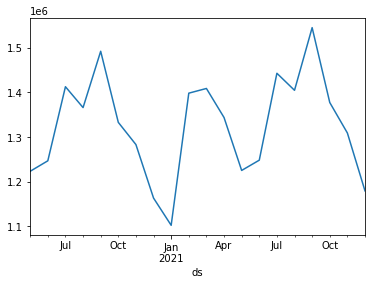

In [43]:
forecast.set_index('ds').iloc[-20:,:].yhat.plot()

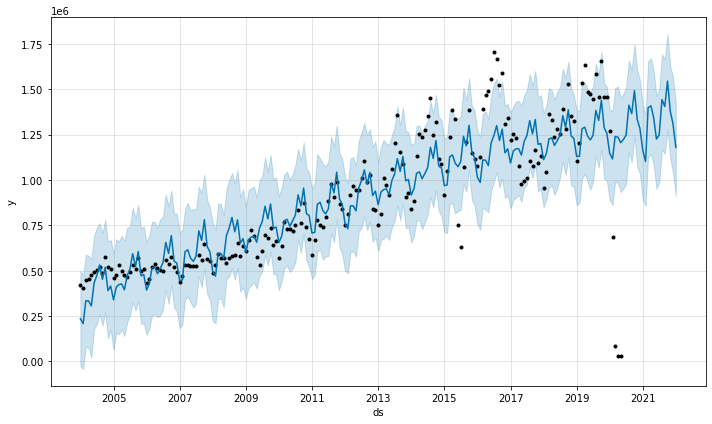

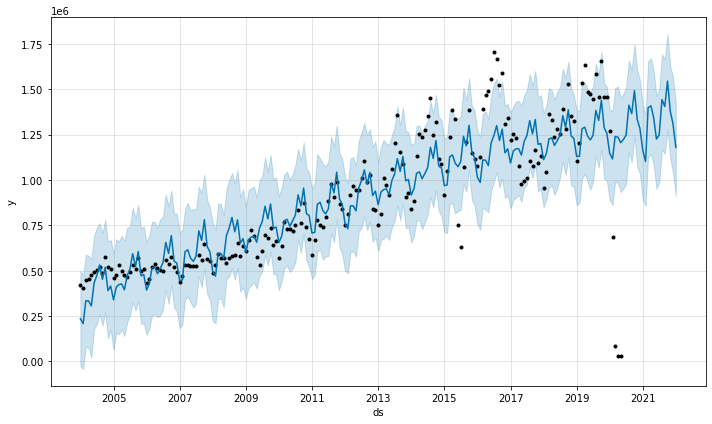

In [44]:
prophet.plot(forecast)

In [120]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-01,3.541904e+05,-8.665040e+04,5.906494e+05,3.541904e+05,3.541904e+05,-106873.686192,-106873.686192,-106873.686192,-106873.686192,-106873.686192,-106873.686192,0.0,0.0,0.0,2.473167e+05
1,2004-02-01,3.585411e+05,-1.073097e+05,5.837728e+05,3.585411e+05,3.585411e+05,-125145.503583,-125145.503583,-125145.503583,-125145.503583,-125145.503583,-125145.503583,0.0,0.0,0.0,2.333956e+05
2,2004-03-01,3.626112e+05,-8.006111e+03,6.686847e+05,3.626112e+05,3.626112e+05,-23380.641637,-23380.641637,-23380.641637,-23380.641637,-23380.641637,-23380.641637,0.0,0.0,0.0,3.392306e+05
3,2004-04-01,3.669620e+05,2.227277e+04,6.928165e+05,3.669620e+05,3.669620e+05,-26891.441707,-26891.441707,-26891.441707,-26891.441707,-26891.441707,-26891.441707,0.0,0.0,0.0,3.400706e+05
4,2004-05-01,3.711724e+05,-9.996054e+03,6.613245e+05,3.711724e+05,3.711724e+05,-57244.477437,-57244.477437,-57244.477437,-57244.477437,-57244.477437,-57244.477437,0.0,0.0,0.0,3.139280e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2021-12-31,1.478900e+06,1.006380e+06,1.697523e+06,1.477515e+06,1.480370e+06,-115011.832482,-115011.832482,-115011.832482,-115011.832482,-115011.832482,-115011.832482,0.0,0.0,0.0,1.363888e+06
217,2022-01-31,1.484558e+06,9.607508e+05,1.687210e+06,1.483064e+06,1.486146e+06,-167333.236676,-167333.236676,-167333.236676,-167333.236676,-167333.236676,-167333.236676,0.0,0.0,0.0,1.317225e+06
218,2022-02-28,1.489668e+06,1.188309e+06,1.904594e+06,1.488076e+06,1.491335e+06,45198.678540,45198.678540,45198.678540,45198.678540,45198.678540,45198.678540,0.0,0.0,0.0,1.534867e+06
219,2022-03-31,1.495327e+06,1.203469e+06,1.892260e+06,1.493541e+06,1.497167e+06,61706.677759,61706.677759,61706.677759,61706.677759,61706.677759,61706.677759,0.0,0.0,0.0,1.557033e+06


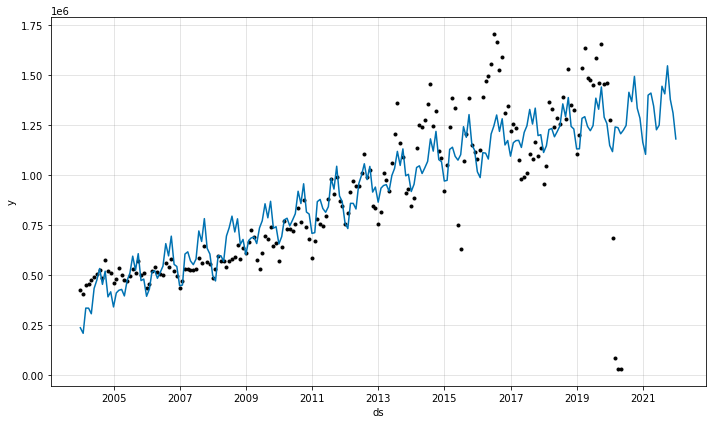

In [46]:
fig1 = prophet.plot(forecast, uncertainty=False)
plt.show()

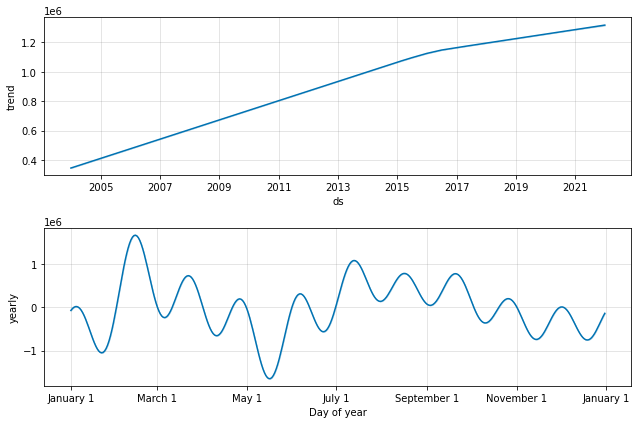

In [45]:
fig2 = prophet.plot_components(forecast)
plt.show()